In [1]:
import sys
import random
sys.path.append("../")
from Core.maze import Maze

# Simplified Prim's Algorithm

## How does it work?
Prim's Algorithm works similarly to Djikstra's algorithm, starting at one point in the grid and moving outward like water flowing, but in this case it constructs a spanning tree across the grid, thus generating a maze.

## Is every node connected?
Yes, every node is connected. This is due to the fact that the algorithm starts at an arbitrary node and does not terminate until all the nodes have been added to the maze.

In [2]:
def SimplePrims(maze):
    unvisited = set([(x, y) for x in range(maze.num_columns) for y in range(maze.num_rows)])
    
    # randomly pick a node to start from
    initial = (
        random.randint(0, maze.num_rows - 1), 
        random.randint(0, maze.num_columns - 1)
    )
    
    current = initial
    reachable = set()
    while True:
        unvisited.remove((current[0], current[1]))
        
        # compute reachable neighbors from current node
        if current[0] > 0 and (current[0] - 1, current[1]) in unvisited:
            reachable.add((current[0] - 1, current[1]))
        if current[0] < maze.num_columns - 1 and (current[0] + 1, current[1]) in unvisited:
            reachable.add((current[0] + 1, current[1]))
        if current[1] > 0 and (current[0], current[1] - 1) in unvisited:
            reachable.add((current[0], current[1] - 1))
        if current[1] < maze.num_rows - 1 and (current[0], current[1] + 1) in unvisited:
            reachable.add((current[0], current[1] + 1))
        
        # randomly pick a neighbor since there is no path weight dissimilarity 
        adjacent = random.choice(list(reachable))
        
        # determine direction of path to be added
        directions = []
        if adjacent[0] > 0 and (adjacent[0] - 1, adjacent[1]) not in unvisited:
            directions.append("W")
        if adjacent[0] < maze.num_columns - 1 and (adjacent[0] + 1, adjacent[1]) not in unvisited:
            directions.append("E")
        if adjacent[1] > 0 and (adjacent[0], adjacent[1] - 1) not in unvisited:
            directions.append("N")
        if adjacent[1] < maze.num_rows - 1 and (adjacent[0], adjacent[1] + 1) not in unvisited:
            directions.append("S")
        
        path = random.choice(directions)
        
        maze.add_path((adjacent[0], adjacent[1]), path, 0)
        reachable.remove(adjacent)
        current = adjacent
        
        # terminate when no more reachable nodes are left
        if not reachable:
            return initial

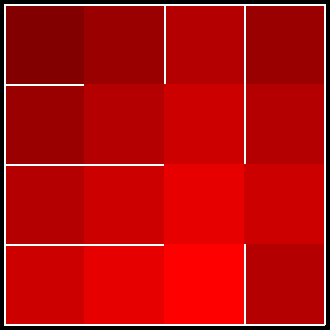

In [11]:
maze = Maze(4, 4)
initial = SimplePrims(maze)
maze.add_colors(start=initial)
display(maze.draw(cell_width=80))

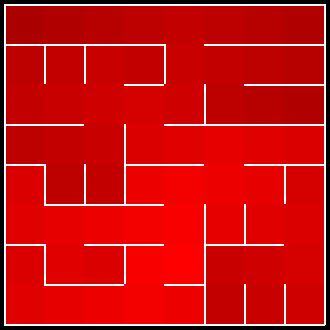

In [15]:
maze = Maze(8, 8)
initial = SimplePrims(maze)
maze.add_colors(start=initial)
display(maze.draw(cell_width=40))

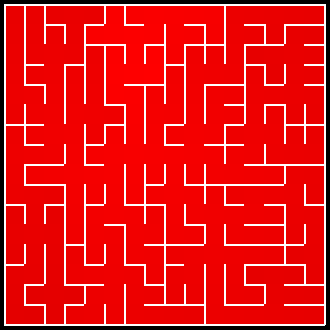

In [16]:
maze = Maze(16, 16)
initial = SimplePrims(maze)
maze.add_colors(start=initial)
display(maze.draw(cell_width=20))

## Basic Analysis
### Time Complexity: O(N<sup>2</sup>)
The time complexity of Prim's Algorithm depends on the data structure used as input. Since we use a grid/adjacency matrix representation as input and traverse all the nodes once, the time complexity turns out to be O(N<sup>2</sup>), where N is the number of cells/nodes in the grid.

### Space Complexity: O(N)
We're also required to keep track of visited/unvisited nodes in the grid to avoid cycles in the spanning tree constructed by our algorithm. Hence, the space complexity would be O(N), where N is the number of cells/nodes in the grid.

### Bias/Texture:
Maps generated using Simple Prim's Algorithm tend to have a radial texture, spreading outward from the random node chosen initially to run the algorithm from. This is because the spanning tree grows out from this node to reach every corner of the maze.